In [72]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import seaborn as sns

In [73]:
init_notebook_mode(connected = True)

In [74]:
cf.go_offline()

In [75]:
df = pd.read_csv('car_data_set')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [77]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [78]:
df.drop_duplicates(inplace=True)

In [79]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Cleaning

 ploting the missing values in each column using heatmaps

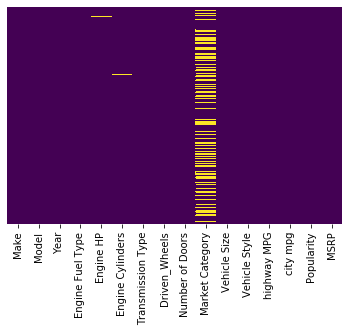

In [80]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The above plot shows that the column 'Market Category' has many missing data and we can make any predicitions on the data so we can drop the whole column 

In [81]:
df.drop('Market Category',axis=1,inplace=True)

Missing values are very less in the dataset so we can just drop the values.

In [82]:
df.dropna(axis=0,inplace =True)

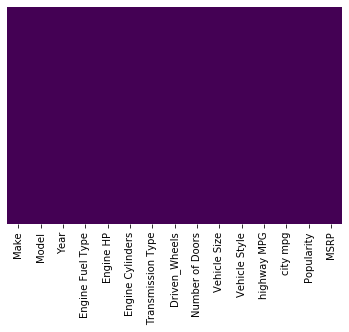

In [83]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

changing column names

In [84]:
df.rename(columns={'Engine HP': 'HP','Engine Cylinders':'Cylinders',
                   'highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price',
                   'Transmission Type':'Transmission','Driven_Wheels':'Drive Mode'},inplace=True)
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


## checking for outliers

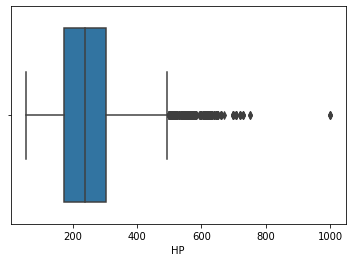

In [85]:
sns.boxplot(df['HP'])

there are many outliers in HP column we can remove the rows which has the HP more than 480

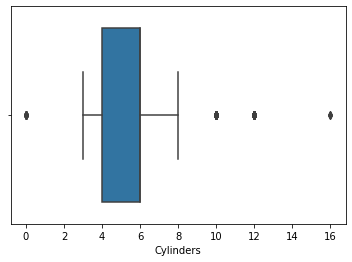

In [86]:
sns.boxplot(df['Cylinders'])

there are very few outliers so we can retain the  values 

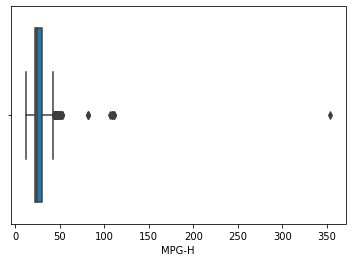

In [87]:
sns.boxplot(df['MPG-H'])

there are many outliers in MPG-H column we can remove the rows which has the MPG-H more than 43

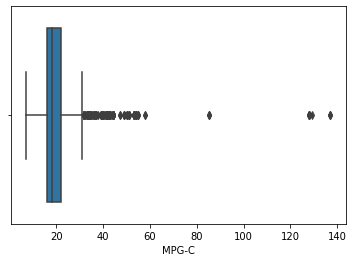

In [88]:
sns.boxplot(df["MPG-C"])

the above box plot shows there are many outliers in the data.So, we can remove the data more than 32

## EDA

In [89]:
print('The following car brands that are represented in the data set : ')
print('\n')
print(df['Make'].unique())

The following car brands that are represented in the data set : 


['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Bugatti']


#### there are around 48 brands that are represented in the dataset

In [90]:
df3 = df.groupby('Make').mean()

The average price of top 5 brands is as follows.

In [91]:
df3 = df3.sort_values(by=['Popularity'],ascending=False).drop(['Year','HP','Cylinders','Number of Doors','MPG-H','MPG-C'],axis='columns')

In [92]:
df3.iloc[0:5]

,Popularity,Price
Make,,
Ford,5657.0,28522.862069
BMW,3916.0,62162.558642
Audi,3105.0,54574.121495
Ferrari,2774.0,237383.823529
Honda,2202.0,26608.883991


### Correlation Matrix

In [93]:
df.corr()

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.337297,-0.026670,0.246173,0.265597,0.220053,0.086580,0.209353
HP,0.337297,1.000000,0.788319,-0.128493,-0.423734,-0.474810,0.041418,0.658983
Cylinders,-0.026670,0.788319,1.000000,-0.147591,-0.614703,-0.634460,0.042705,0.551988
Number of Doors,0.246173,-0.128493,-0.147591,1.000000,0.116920,0.137386,-0.058979,-0.145600
MPG-H,0.265597,-0.423734,-0.614703,0.116920,1.000000,0.842834,-0.024927,-0.207774
MPG-C,0.220053,-0.474810,-0.634460,0.137386,0.842834,1.000000,-0.007238,-0.232699
Popularity,0.086580,0.041418,0.042705,-0.058979,-0.024927,-0.007238,1.000000,-0.048490
Price,0.209353,0.658983,0.551988,-0.145600,-0.207774,-0.232699,-0.048490,1.000000


In [94]:
df.corr().iplot(kind='heatmap',xTitle='correlation matrix')

- from the above matrix we can conclude that the target variable 'Price' is highly co-related with HP and less corelated with MPG-C feature.
- we can also conclude that engine HP and cylinders have high corelation
- the MPG-H is anti-corelated with cylinders of the engine

lets see how my price is distributed

In [95]:
df['Price'].iplot(kind='hist',xrange=[0,400000],xTitle='Distribution of price',theme='solar')

the prices of most of the car brand ranges from 5k to 100k

lets check how the average price of cars was distibuted over the past years

In [96]:
df.iplot(kind='bar',x='Year',y='Price',xTitle='Year',yTitle='Prices',theme='solar')

As we see the prices were less during 1990-2000 and there was a drastic increase in the price during past 10 years

lets see how the prices depened on HP and MCG-C features from the data set

In [97]:
df.iplot(kind='scatter',x='Price',y='HP',secondary_y='MPG-C',xTitle="Prices",
         yTitle='Engine HP',secondary_y_title='MPG-C',theme='solar',mode='markers')

from the above plot we can conclude that the car which has high HP and price will have a less MPG-c(milage in city)

In [98]:
count={}
for year in df['Year'].unique():
    count[year]=0
    for i in df['Year']:
        if i==year:
            count[year]+=1
        else:
            continue
df3 = pd.DataFrame(count,index=["count"])
df3 = df3.transpose()

df3.head()

,count
2011,279
2012,350
2013,322
1992,127
1993,159


In [99]:

df3.iplot(kind='bar',xTitle='Year',yTitle='number of cars sold',theme='solar')

Very few cars were sold during the period of 1990-2000

In [100]:
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


we can drop the columns <font color=red> ['Model' , 'Engine Fuel Type' , 'Transmission' , 'Drive mode' , 'Vehicle Size' , 'Vehicle Style', 'values' ]  </font>

because they are in the string format type and any useful features can't be extracted for this regression type of probelm.

In [101]:
df.drop(['Model','Engine Fuel Type','Transmission','Drive Mode','Vehicle Size','Vehicle Style'],axis=1,inplace=True)

In [102]:
df.head()

,Make,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
0,BMW,2011,335.0,6.0,2.0,26,19,3916,46135
1,BMW,2011,300.0,6.0,2.0,28,19,3916,40650
2,BMW,2011,300.0,6.0,2.0,28,20,3916,36350
3,BMW,2011,230.0,6.0,2.0,28,18,3916,29450
4,BMW,2011,230.0,6.0,2.0,28,18,3916,34500


## removing ouliers

In [165]:
df= df[df['HP']<480 ]

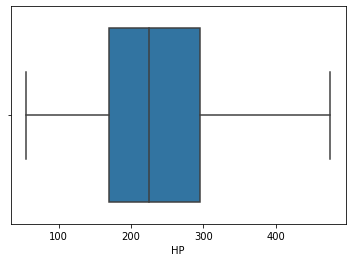

In [159]:
sns.boxplot(df['HP'])

In [162]:
df= df[df['MPG-H']<43]

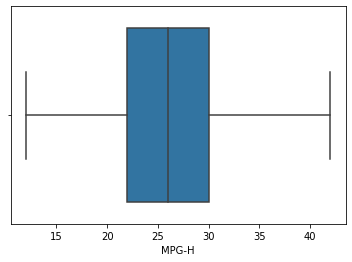

In [163]:
sns.boxplot(df['MPG-H'])

In [168]:
df=df[df['MPG-C']<32]

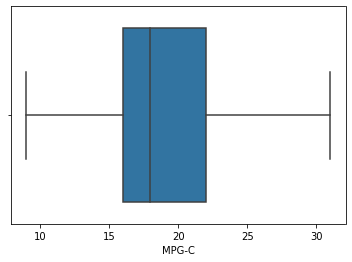

In [170]:
sns.boxplot(df['MPG-C'])

## Training the machine learning model

### spliting training and testing data

In [171]:
x = df.drop(['Make','Price'],axis = 1)
y = df['Price']

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [174]:
from sklearn.preprocessing import Normalizer

In [175]:
norm = Normalizer()

In [176]:
x_train = norm.fit_transform(x_train)

In [177]:
x_test = norm.fit_transform(x_test)

### using decision tree 

In [178]:
from sklearn import tree

In [179]:
model = tree.DecisionTreeRegressor(max_depth=7)

In [180]:
model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [181]:
predictions = model.predict(x_test)

In [182]:
from sklearn import metrics

In [183]:
metrics.mean_absolute_error(y_test,predictions)

6985.913575823243

In [184]:
metrics.mean_squared_error(y_test,predictions)

164383120.99908078

In [185]:
metrics.r2_score(y_test,predictions)

0.7957407749493147

### using Random forest

In [187]:
from sklearn import ensemble

In [188]:
rfr = ensemble.RandomForestRegressor(max_depth=7)

In [189]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [190]:
prediction_rfr = rfr.predict(x_test)

In [191]:
metrics.mean_absolute_error(y_test,prediction_rfr)

6398.353578919181

In [207]:
metrics.mean_squared_error(y_test,prediction_rfr)

109532748.04451187

In [208]:
metrics.r2_score(y_test,prediction_rfr)

0.8638967669109465

## using bayesian regression

In [193]:
from sklearn.linear_model import BayesianRidge 

In [194]:
model2 = BayesianRidge()

In [195]:
model2.fit(x_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [196]:
predictions2 = model2.predict(x_test)

In [197]:
metrics.mean_absolute_error(y_test,predictions2)

10897.917973524503

In [209]:
metrics.mean_squared_error(y_test,predictions2)

430394052.32585806

In [198]:
metrics.r2_score(y_test,predictions2)

0.46520083655671995

### using ridge regression

In [199]:
from sklearn import linear_model

In [200]:
alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]

In [201]:
reg = linear_model.RidgeCV(alphas=alphas)

In [202]:
reg.fit(x_train,y_train)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]), cv=None,
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [203]:
reg.alpha_

0.1

In [204]:
prediction = reg.predict(x_test)

In [205]:
metrics.mean_absolute_error(y_test,prediction)

11085.384923166164

In [210]:
metrics.mean_squared_error(y_test,prediction)

440259959.51801264

In [206]:
metrics.r2_score(y_test,predictions2)

0.46520083655671995